<h1><center>Práctica Aprendizaje Airbnb: Modelos.</center></h1>

# 0. Librerías

In [1]:
# Paquetes y librerias
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

En primer lugar, obtenemos los datos del análisis exploratorio hecho previamente, habiendo separado los datos en un conjunto de entrenamiento y de test.

In [3]:
# Importacion de datos
X_train = pd.read_csv('./Datos/X_train.csv')
X_test = pd.read_csv('./Datos/X_test.csv')
y_train = pd.read_csv('./Datos/y_train.csv')
y_test = pd.read_csv('./Datos/y_test.csv')

# 3. Modelos

Para evaluar los distintos modelos, vamos a tener en cuenta los siguientes aspectos.

Como nos encontramos ante un problema de regresión, utilizamos las siguientes medidas de evaluación para comparar los modelos candidatos:

* Error cuadrático medio $\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$

* Coeficiente de determinación $R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

In [4]:
# Librerias
from sklearn.metrics import mean_squared_error, r2_score

Así, para realizar la comparación entre los modelos, vamos a guardar las métricas de cada uno diccionarios.

In [5]:
# Almacenamiento de metricas
rmse = {}
r2 = {}

También tendremos en cuenta la matriz de confusión para estos modelos.

Para ello, clasificaremos las predicciones realizadas por los modelo de regresión en tres categoricas (que almacenaremos en el vector *y_pred_clas*) y compararemos con los datos de *y_test_clas*, correspondientes a la argupación en las categorías de los datos de test.

In [6]:
# Librerias
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
# Rangos 
y = pd.concat([y_train,y_test],axis = 0)
y = y.values.flatten()

# Problema de clasificacion
y_clas = pd.qcut(y, 3, labels=False)

# Cortes
quantiles = pd.qcut(y, 3).unique().sort_values()
print(quantiles)

[(2.638, 4.511], (4.511, 5.011], (5.011, 7.955]]
Categories (3, interval[float64, right]): [(2.638, 4.511] < (4.511, 5.011] < (5.011, 7.955]]


In [8]:
# Cortes
bins = [2.638, 4.511, 5.011, 7.955]

# Clasificacion 
y_test_clas = pd.qcut(y_test.values.flatten(), 3, labels=False)

In [9]:
# Almacenamiento de metricas
mc = {}

## 3.1 Regresión lineal

El modelo de regresión lineal tiene la siguiente forma parámetrica:

$$
\hat{y} = \beta_0 + \beta_1 x_1 \ldots + \beta_p x_p 
$$

donde $\hat{y} \in \mathbb{R}$ es la variable a predecir y los datos tienen $p$ columnas, $x \in \mathbb{R}^p$. 

Asumiendo un conjunto de datos de entrenamiento, $\mathcal{D_{tr}} = \lbrace (x, y) \rbrace$, los parámetros $\beta, \beta_0$ se pueden ajustar resolviendo el siguiente problema de optimización (mínimos cuadrados):

$$
\min_{\beta, \beta_0} \sum_{x \in \mathcal{D_{tr}}} (\hat{y} - y )^2 = \min_{\beta, \beta_0} \sum_{x \in \mathcal{D_{tr}}} (\beta^\intercal x + \beta_0 - y )^2
$$

In [10]:
# Librerias
from sklearn.linear_model import LinearRegression

Ajustamos el modelo de regresión lineal

In [11]:
# Ajuste del modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predicciones
y_pred = reg.predict(X_test)

En primer lugar, vemos los coeficientes del modelo. A partir de estos coeficientes, podemos determinar qué características son más relevantes para de predecir el precio de las casas.

In [12]:
# Coeficientes del modelo
print('Término independiente: \n', reg.intercept_)
print('Coeficientes: \n', reg.coef_)
print('Nombre de las variables: \n' ,reg.feature_names_in_)

Término independiente: 
 [4.67147683]
Coeficientes: 
 [[ 0.09851137 -0.11226524  0.34718063  0.00337686  0.02812527  0.01700414
  -0.03830007 -0.04793544  0.25404687 -0.07368748 -0.18035938]]
Nombre de las variables: 
 ['latitude' 'longitude' 'accommodates' 'beds' 'security_deposit'
 'cleaning_fee' 'extra_people' 'review' 'Entire home/apt' 'Private room'
 'Shared room']


Como se trata de un modelo de regresión, vamos a analizar los residuos del modelo para comprobar que se cumplen las hipótesis de normalidad, independencia y homocedasticidad. Este análisis se realizará una única vez.

In [13]:
# Librerias
import scipy.stats as stats
import statsmodels.api as sm

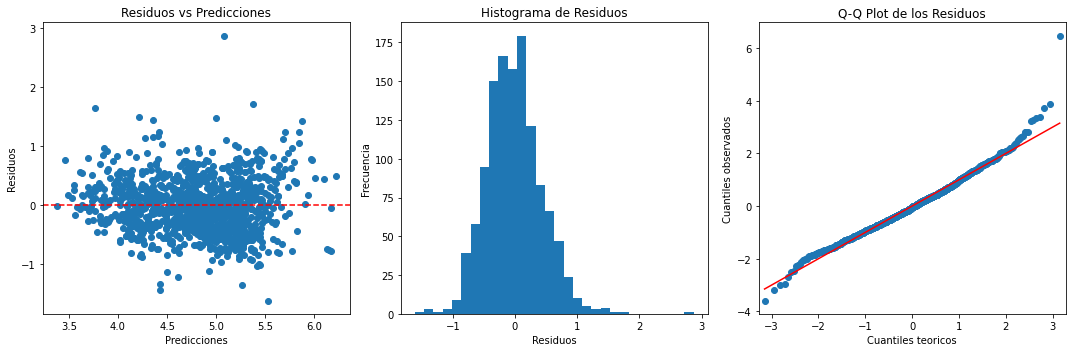

In [14]:
# Residuos
res = y_test - y_pred

# Graficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot de residuos vs predicciones
axs[0].scatter(y_pred, res['price'])
axs[0].axhline(y=0, color='r', linestyle='--')
axs[0].set_xlabel('Predicciones')
axs[0].set_ylabel('Residuos')
axs[0].set_title('Residuos vs Predicciones')

# Histograma de los residuos
axs[1].hist(res['price'], bins=30)
axs[1].set_xlabel('Residuos')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Histograma de Residuos')

# Q-Q plot de los residuos
residuos_estandarizados = (res['price'] - np.mean(res ['price'])) / np.std(res['price'])
sm.qqplot(residuos_estandarizados, line='s', ax=axs[2])
axs[2].set_xlabel('Cuantiles teoricos')
axs[2].set_ylabel('Cuantiles observados')
axs[2].set_title('Q-Q Plot de los Residuos')

plt.tight_layout()

plt.show()

Podemos observar que hay un residuo muy grande. Consideramos este como un outlier y procedemos a eliminarlo del modelo, pues puede afectar negativamente a la calidad del ajuste y distorsionar los resultados. 

In [15]:
# Posicion del residuo mas alto
pos = res['price'].sort_values(ascending=False).index[0]

# Localizacion del residuo
X_test.iloc[pos,:]

latitude            0.658923
longitude          -0.102752
accommodates        0.011886
beds               -0.657623
security_deposit   -1.367867
cleaning_fee        0.634211
extra_people       -1.133644
review             -1.278297
Entire home/apt     1.000000
Private room        0.000000
Shared room         0.000000
Name: 165, dtype: float64

In [16]:
# Eliminacion de la observacion
X_test.drop(pos,axis=0,inplace=True)
y_test.drop(pos,axis = 0, inplace=True)

# Prediccion sin outlier
y_pred = reg.predict(X_test)

# Clasificacion 
y_test_clas = pd.qcut(y_test.values.flatten(), 3, labels=False)

Después de eliminar el outlier y ajustar el modelo, evaluamos nuevamente los residuos para verificar si se cumplen las hipótesis.

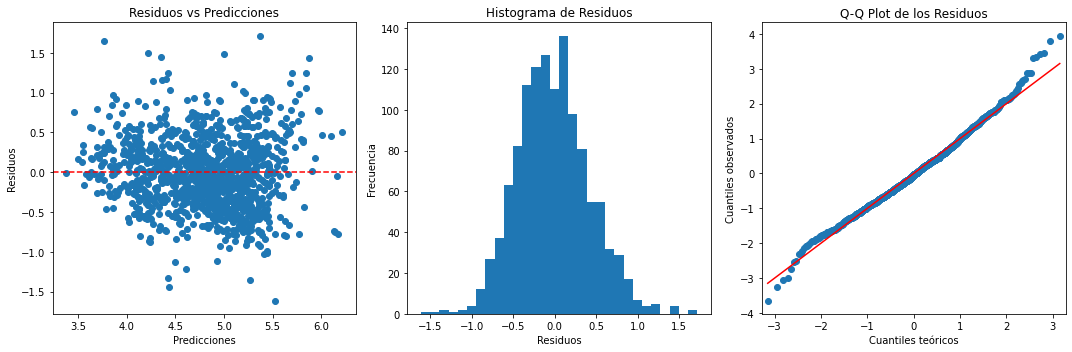

In [17]:
# Residuos
res = y_test - y_pred

# Graficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot de residuos vs predicciones
axs[0].scatter(y_pred, res['price'])
axs[0].axhline(y=0, color='r', linestyle='--')
axs[0].set_xlabel('Predicciones')
axs[0].set_ylabel('Residuos')
axs[0].set_title('Residuos vs Predicciones')

# Histograma de los residuos
axs[1].hist(res['price'], bins=30)
axs[1].set_xlabel('Residuos')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Histograma de Residuos')

# Q-Q plot de los residuos
residuos_estandarizados = (res['price'] - np.mean(res ['price'])) / np.std(res['price'])
sm.qqplot(residuos_estandarizados, line='s', ax=axs[2])
axs[2].set_xlabel('Cuantiles teóricos')
axs[2].set_ylabel('Cuantiles observados')
axs[2].set_title('Q-Q Plot de los Residuos')

plt.tight_layout()

plt.show()

Los residuos del modelo no presentan patrones aparentes y el histograma con el qq-plot sugieren que siguen una distribución normal. Esto respalda la validez del modelo. 

En segundo lugar, calculamos las métricas y evaluamos el ajuste del modelo.

In [18]:
# Metricas de test
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred))
r2_reg  = r2_score(y_test, y_pred)

print("Error cuadratico medio: %.2f" % rmse_reg)
print('R2: %.2f' % r2_reg)

Error cuadratico medio: 0.44
R2: 0.55


Por último, almacenamos los datos para la comparativa final

In [19]:
# Almacenamiento de metricas
rmse['LReg'] = rmse_reg
r2['LReg'] = r2_reg

Como ya comentamos, podemos analizar la matriz de confusión para poder comparar todos los modelos.

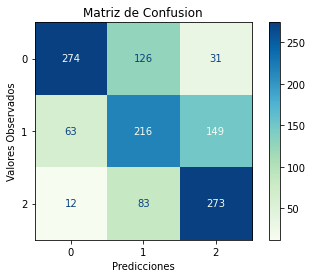

In [20]:
# Matriz de confusion
y_pred_clas = pd.cut(y_pred.flatten(), bins=bins, labels=False)

# Grafico
mc_reg = confusion_matrix(y_test_clas, y_pred_clas)
disp = ConfusionMatrixDisplay(confusion_matrix=mc_reg)
disp.plot(cmap='GnBu')

plt.title('Matriz de Confusion')
plt.xlabel('Predicciones')
plt.ylabel('Valores Observados')

plt.show()

# Almacenamiento de metricas
mc['LReg'] = mc_reg

## 3.2 K-NN

El algoritmo de los k-vecinos más cercanos es un algoritmo de aprendizaje supervisado usado tanto en problemas de regresión como en problemas de clasificación. Es un método no paramétrico que asume que existen similaridades en la proximidad sin necesidad de que los datos respondan a una linealidad. 

El algoritmo calcula las distancias entre los datos de test y todos los puntos de los datos de entrenamiento, escogiendo un número $k$ de distancias mínimas. Para realizar la predicción se realiza un promedio de los valores dependientes.

En primer lugar, queremos encontrar el número de vecinos óptimo. Para ello, creamos una rejilla con diferentes valores de $k$ que recorremos para ajustar el modelo y almacenar las métricas correspondientes. Luego, seleccionamos el valor de $k$ que proporciona el mejor desempeño según las métricas evaluadas.

In [21]:
# Librerias
from sklearn.neighbors import KNeighborsRegressor

Para poder elegir entre los diferentes modelos, utilizamos la validación cruzada (cross-validation) dividiendo los datos del conjunto de entrenamiento en dos subconjuntos: *X_cv_train* y *X_cv_test*. Entrenamos los modelos utilizando los datos de *X_cv_train* y evaluamos cada modelo entrenado utilizando los datos de *X_cv_test*.

In [22]:
# Particion de datos
X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X_train, y_train, test_size=0.3)

Recorremos la rejilla de hiperparámetros para encontrar el valor óptimo.

In [23]:
# Posible numero de vecinos
ks = list(range(1,10))

# Almacenamiento de metricas
rmses = {}
r2s = {}

# Hiperparametrizacion
for k in ks:
    
    # Ajuste del modelo 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_cv_train, y_cv_train)
    
    # Predicciones sobre test
    y_pred = knn.predict(X_cv_test)
    
    # Metricas
    rmse_k = np.sqrt(mean_squared_error(y_cv_test, y_pred))
    r2_k  = r2_score(y_cv_test, y_pred)
    rmses[k] = rmse_k
    r2s[k] = r2_k

# Optimo
min_rmses = min(rmses,key=rmses.get)
max_r2s = max(r2s, key=r2s.get)
    
print("Mejor hiperparámtero RMSE:", min_rmses)
print("Mejor hiperparámetro R2:", max_r2s)

Mejor hiperparámtero RMSE: 9
Mejor hiperparámetro R2: 9


Mediante el análisis de los gráficos de codo, podemos determinar el número óptimo de vecinos $k$ para el problema.

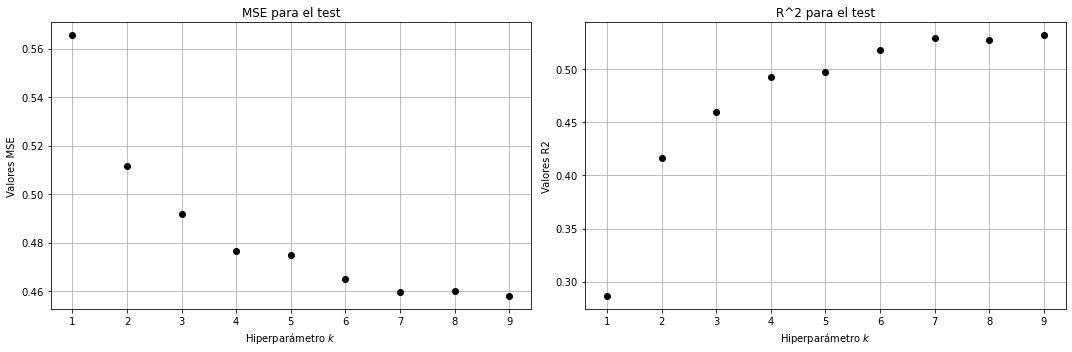

In [24]:
# Error cuadratico medio para test
ks_arr = np.fromiter(rmses.keys(), dtype=int)
rmses_arr = np.fromiter(rmses.values(), dtype=float)

# R2 para test
ks_arr = np.fromiter(r2s.keys(), dtype=int)
r2s_arr = np.fromiter(r2s.values(), dtype=float)

# Graficos 
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# MSE para el conjunto de test
axs[0].plot(ks_arr, rmses_arr, 'ok')
axs[0].grid(True)
axs[0].set_xlabel('Hiperparámetro $k$')
axs[0].set_ylabel('Valores MSE')
axs[0].set_title('MSE para el test')

# R2 para el conjunto de test
axs[1].plot(ks_arr, r2s_arr, 'ok')
axs[1].grid(True)
axs[1].set_xlabel('Hiperparámetro $k$')
axs[1].set_ylabel('Valores R2')
axs[1].set_title('R^2 para el test')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Así, decidimos ajustar el modelo con $k=6$ vecinos

In [25]:
# Ajuste del modelo
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
    
# Predicciones
y_pred = knn.predict(X_test)

Calculamos las métricas y evaluamos el ajuste del modelo.

In [26]:
# Metricas de test
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))
r2_knn  = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f" % rmse_knn)
print('Variance score: %.2f' % r2_knn)

Root Mean squared error: 0.42
Variance score: 0.58


In [27]:
# Almacenamiento de metricas
rmse['KNN'] = rmse_knn
r2['KNN'] = r2_knn

Nuevamente, calculamos la matriz de confusión del modelo.

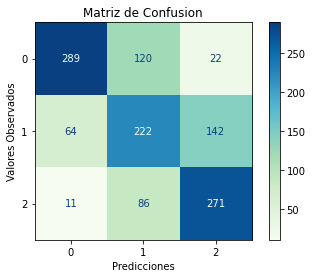

In [28]:
# Matriz de confusion 
y_pred_clas = pd.cut(y_pred.flatten(), bins=bins, labels=False)

# Grafico
mc_knn = confusion_matrix(y_test_clas, y_pred_clas)
disp = ConfusionMatrixDisplay(confusion_matrix=mc_knn)
disp.plot(cmap='GnBu')

plt.title('Matriz de Confusion')
plt.xlabel('Predicciones')
plt.ylabel('Valores Observados')

plt.show()

# Almacenamiento de metricas
mc['KNN'] = mc_knn

## 3.3 Árbol de decisión simple

Un árbol de decisión es un modelo de aprendizaje automático que se utiliza para predecir una variable objetivo a partir de un conjunto de variables de entrada. El árbol se divide en ramas que representan decisiones basadas en las variables de entrada, y las hojas del árbol representan la predicción final para la variable objetivo.

Cada nodo en el árbol corresponde a una pregunta sobre una de las variables de entrada y la respuesta a esa pregunta determina en qué rama del árbol continuar.

In [29]:
# Librerias
from sklearn.tree import DecisionTreeRegressor

En primer lugar, encontramos la profundidad óptima del árbol. Para ello, utilizamos una rejilla de hiperparámetros que vamos recorriendo hasta encontrar el parámetro óptimo.

Utilizamos los datos separados del conjunto de entrenamiento para la validación cruzada.

In [30]:
# Posible profundidad del arbol
ks = list(range(1,10))

# Almacenamiento de metricas
rmses = {}
r2s = {}

# Hiperparametrizacion
for k in ks:
    
    # Ajuste del modelo
    tree = DecisionTreeRegressor(max_depth=k)
    tree.fit(X_cv_train, y_cv_train)
    
    # Prediccion
    y_pred = tree.predict(X_cv_test)
    
    # Metricas
    rmse_k = np.sqrt(mean_squared_error(y_cv_test, y_pred))
    r2_k  = r2_score(y_cv_test, y_pred)
    rmses[k] = rmse_k
    r2s[k] = r2_k

# Optimo
min_rmses = min(rmses,key=rmses.get)
max_r2s = max(r2s, key=r2s.get)
    
print("Mejor hiperparámtero RMSE:", min_rmses)
print("Mejor hiperparámetro R2:", max_r2s)

Mejor hiperparámtero RMSE: 5
Mejor hiperparámetro R2: 5


Mediante el análisis de los gráficos de codo, determinamos el número óptimo de la profundidad del árbol.

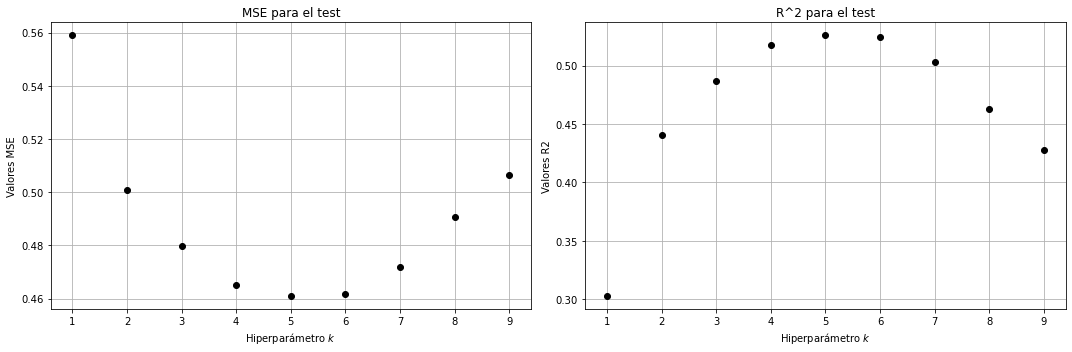

In [31]:
# Error cuadratico medio para test
ks_arr = np.fromiter(rmses.keys(), dtype=int)
rmses_arr = np.fromiter(rmses.values(), dtype=float)

# R2 para test
ks_arr = np.fromiter(r2s.keys(), dtype=int)
r2s_arr = np.fromiter(r2s.values(), dtype=float)

# Graficos 
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# MSE para el conjunto de test
axs[0].plot(ks_arr, rmses_arr, 'ok')
axs[0].grid(True)
axs[0].set_xlabel('Hiperparámetro $k$')
axs[0].set_ylabel('Valores MSE')
axs[0].set_title('MSE para el test')

# R2 para el conjunto de test
axs[1].plot(ks_arr, r2s_arr, 'ok')
axs[1].grid(True)
axs[1].set_xlabel('Hiperparámetro $k$')
axs[1].set_ylabel('Valores R2')
axs[1].set_title('R^2 para el test')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Ajustamos el modelo con la profundidad óptima $\text{max_depth}=6$.

In [32]:
# Ajuste del modelo
arbol = DecisionTreeRegressor(max_depth=6)
arbol.fit(X_train, y_train)

# Predicciones
y_pred = arbol.predict(X_test)

Calculamos las métricas y evaluamos el ajuste del modelo.

In [33]:
# Metricas de test
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred))
r2_tree = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f" % rmse_tree)
print('Variance score: %.2f' % r2_tree)

Root Mean squared error: 0.43
Variance score: 0.58


In [34]:
# Almacenamiento de metricas
rmse['Arbol'] = rmse_tree
r2['Arbol'] = r2_tree

Calculamos la matriz de confusión del modelo.

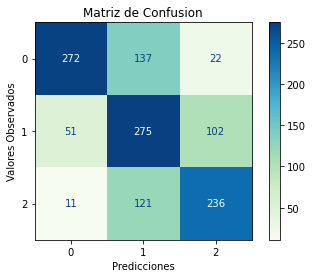

In [35]:
# Matriz de confusion
y_pred_clas = pd.cut(y_pred.flatten(), bins=bins, labels=False)

# Grafico
mc_tree = confusion_matrix(y_test_clas, y_pred_clas)
disp = ConfusionMatrixDisplay(confusion_matrix=mc_tree)
disp.plot(cmap='GnBu')

plt.title('Matriz de Confusion')
plt.xlabel('Predicciones')
plt.ylabel('Valores Observados')

plt.show()

# Almacenamiento de metricas
mc['Arbol'] = mc_tree

Como el árbol de decisión sigue una estructura similar al pensamiento humano, tiene fácil representación en el plano. 

In [36]:
# Librerias
from sklearn import tree 

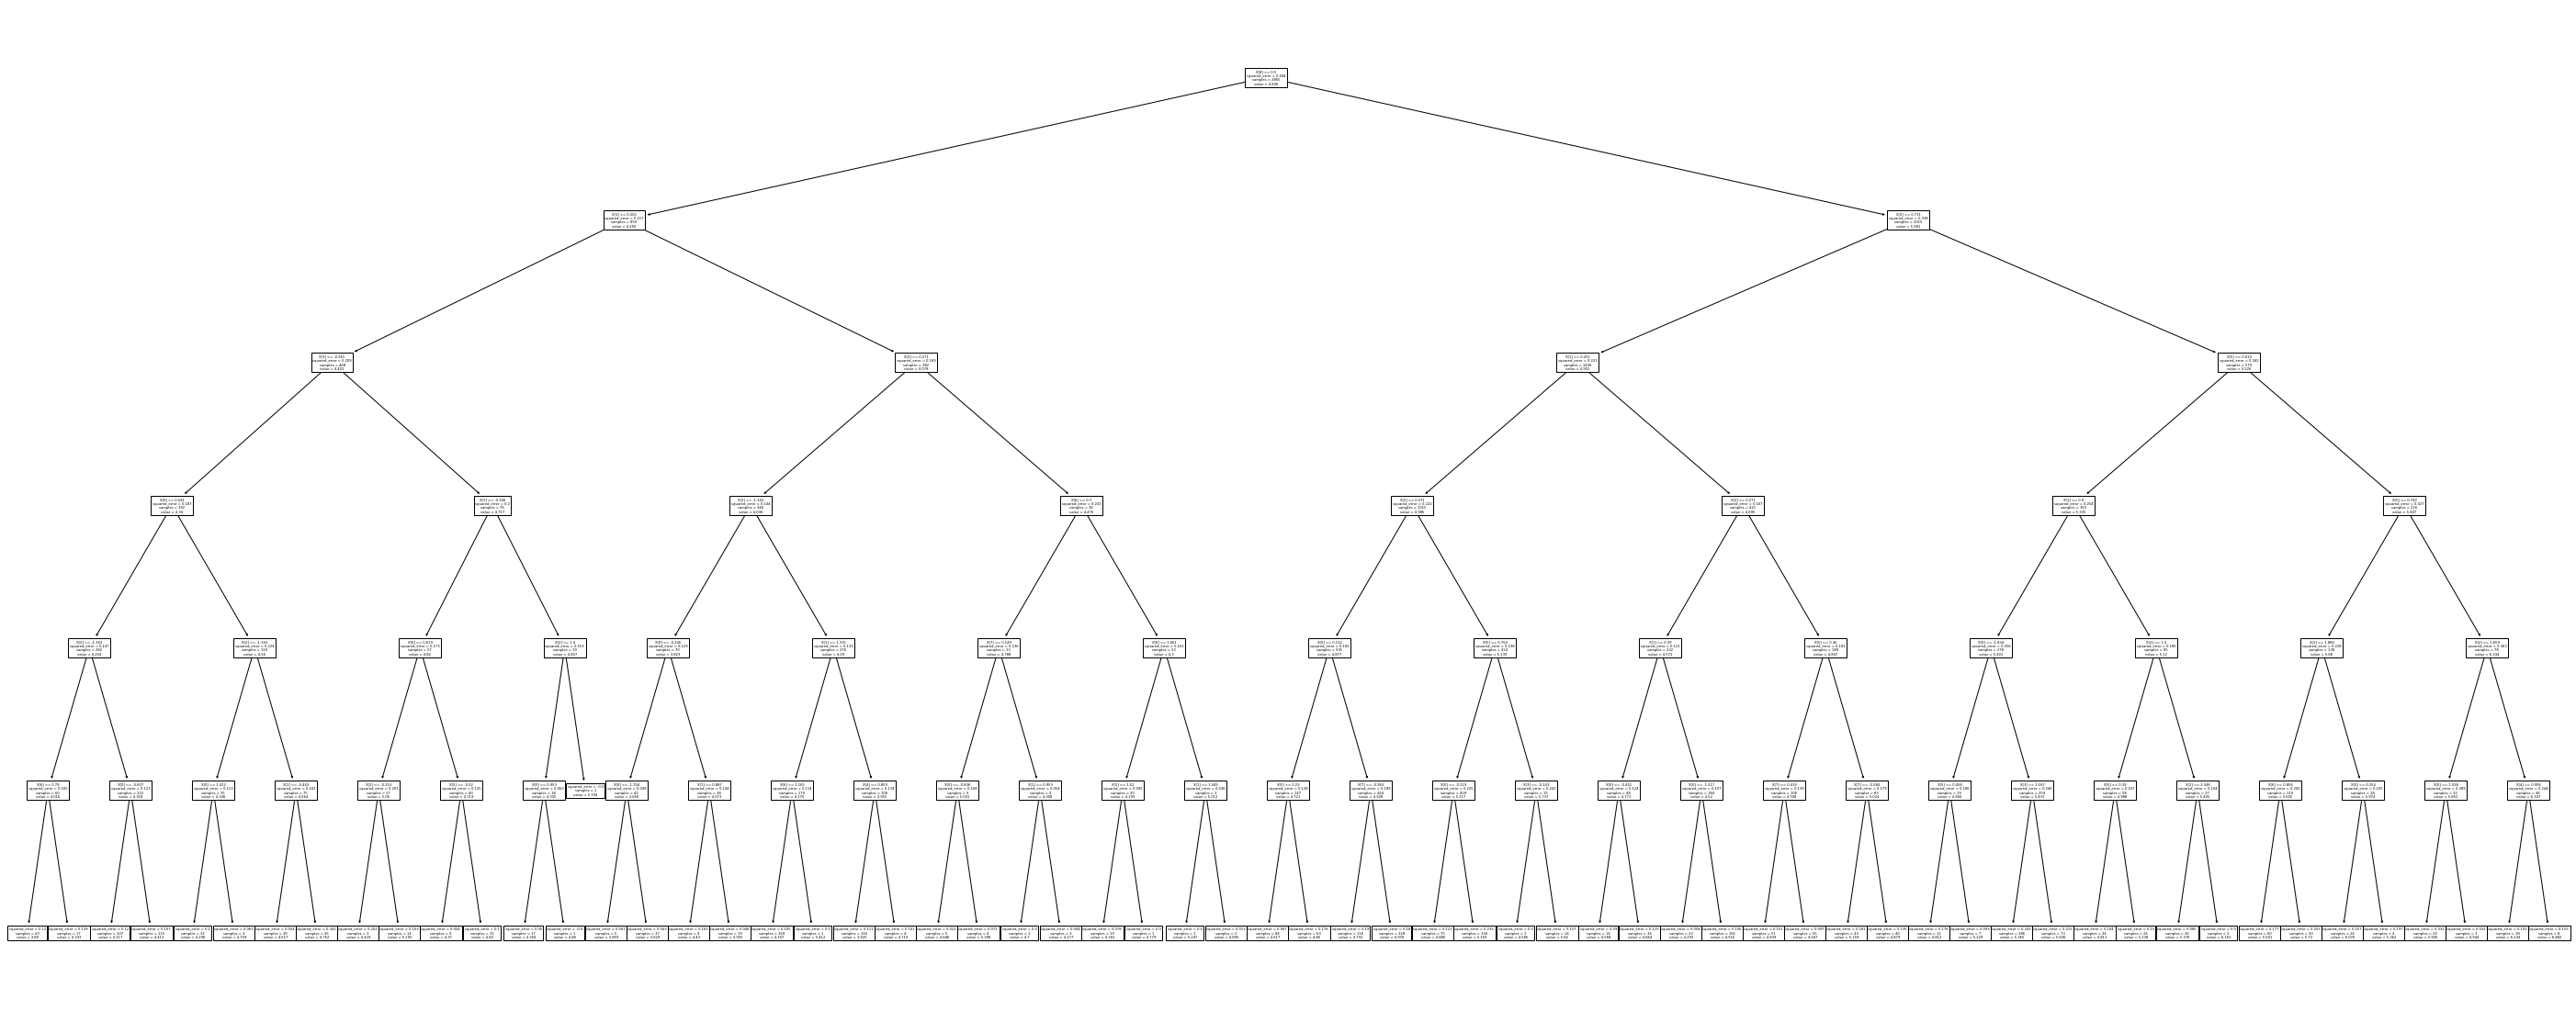

In [37]:
# Grafico
plt.figure(figsize=(50,20))
tree.plot_tree(arbol)
plt.show()

La estructura de un árbol de decisión permite detectar de forma sencilla aquellas variables que son más influyentes en la predicción.

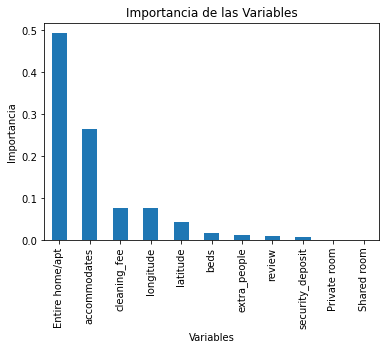

In [38]:
# Importancia de las variables
feature_importances = pd.Series(arbol.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot(kind='bar')

plt.title('Importancia de las Variables')
plt.xlabel('Variables')
plt.ylabel('Importancia')

plt.show()

Así pues, las variables más influyentes en nuestro caso son _Entire home/apt_ y _accommodates_.

## 3.4 Bagging

Los algoritmos de bagging son algoritmos de ensemble que tiene como objetivo reducir la varianza de cada uno de los algoritmos individuales agregando diferentes algoritmos y sus respectivas predicciones.

Así, los algoritmos de bagging crean diferentes muestras boostrap con remplazaiento del conjunto de datos de entrenamiento, y cada método individual es entrenado en una de las diferentes remuestras creadas.

Aunque se puede crear un propio algoritmo de ensemble, normalmente se suelen utilizar árboles de decisión. 

In [39]:
# Librerias 
from sklearn.ensemble import BaggingRegressor

Primero, encontramos el hiperparámetro óptimo del modelo, es decir, el número de modelos individuales o "estimadores".

In [40]:
# Posibles numero de arboles
ks = np.array(range(1,100,5))

# Almacenamiento de metricas
rmses = {}
r2s = {}

# Hiperparamtrizacion
for k in ks:
    
    # Ajuste del modelo
    clf = BaggingRegressor(n_estimators = k)
    clf.fit(X_cv_train, y_cv_train)

    # Predicciones
    y_pred = clf.predict(X_cv_test)
    
    # Almacenamiento de metricas 
    rmse_k = np.sqrt(mean_squared_error(y_cv_test, y_pred))
    r2_k  = r2_score(y_cv_test, y_pred)
    rmses[k] = rmse_k
    r2s[k] = r2_k

# Optimo
min_rmses = min(rmses,key=rmses.get)
max_r2s = max(r2s, key=r2s.get)
    
print("Mejor hiperparámtero RMSE:", min_rmses)
print("Mejor hiperparámetro R2:", max_r2s)

Mejor hiperparámtero RMSE: 71
Mejor hiperparámetro R2: 71


Mediante el análisis del gráfico de codo, seleccionamos el número óptimo de árboles o estimadores.

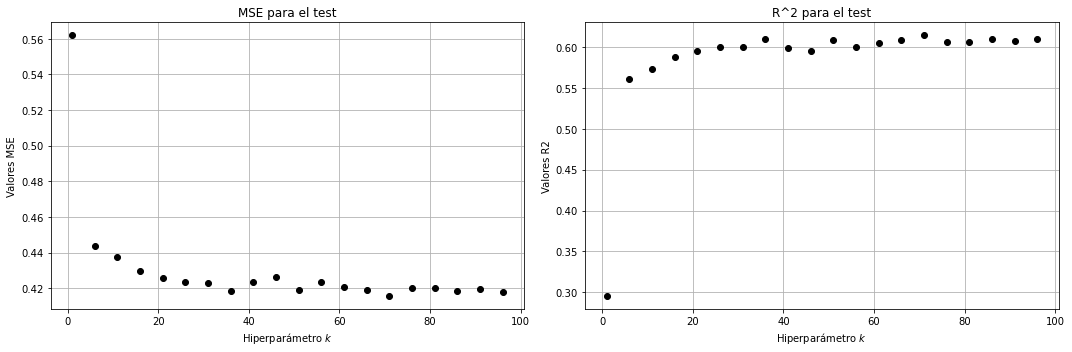

In [41]:
# Error cuadratico medio para el test
ks_arr = np.fromiter(rmses.keys(), dtype=int)
rmses_arr = np.fromiter(rmses.values(), dtype=float)

# R2 para el test
ks_arr = np.fromiter(r2s.keys(), dtype=int)
r2s_arr = np.fromiter(r2s.values(), dtype=float)

# Graficos 
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# MSE para el conjunto de test
axs[0].plot(ks_arr, rmses_arr, 'ok')
axs[0].grid(True)
axs[0].set_xlabel('Hiperparámetro $k$')
axs[0].set_ylabel('Valores MSE')
axs[0].set_title('MSE para el test')

# R2 para el conjunto de test
axs[1].plot(ks_arr, r2s_arr, 'ok')
axs[1].grid(True)
axs[1].set_xlabel('Hiperparámetro $k$')
axs[1].set_ylabel('Valores R2')
axs[1].set_title('R^2 para el test')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Ajustamos el modelo utilizando $\text{n_estimators}=50$ árboles regresores como modelos individuales en el algoritmo de bagging.

In [42]:
# Ajuste del modelo
bagg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=56, random_state=0).fit(X_train, y_train)

# Predicciones
y_pred = bagg.predict(X_test)

Calculamos las métricas y evaluamos el ajuste del modelo.

In [43]:
# Metricas de test
rmse_bagg = np.sqrt(mean_squared_error(y_test, y_pred))
r2_bagg  = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f" % rmse_bagg)
print('Variance score: %.2f' % r2_bagg)

Root Mean squared error: 0.38
Variance score: 0.66


In [44]:
# Almacenamiento de metricas
rmse['Bagging'] = rmse_bagg
r2['Bagging'] = r2_bagg

Calculamos la matriz de confusión del modelo.

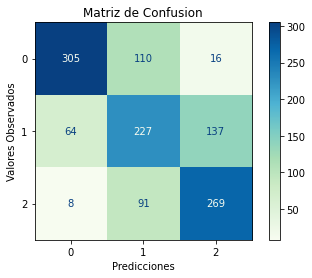

In [45]:
# Matriz de confusion 
y_pred_clas = pd.cut(y_pred.flatten(), bins=bins, labels=False)

# Grafico
mc_bagg = confusion_matrix(y_test_clas, y_pred_clas)
disp = ConfusionMatrixDisplay(confusion_matrix=mc_bagg)
disp.plot(cmap='GnBu')

plt.title('Matriz de Confusion')
plt.xlabel('Predicciones')
plt.ylabel('Valores Observados')

plt.show()

# Almacenamiento de metricas
mc['Bagging'] = mc_bagg

## 3.5 Random Forest

Se trata de un modelo de ensamble que combia varios árboles de decisión para hacer predicciones. Así, cada árbol de decisión es entrenado en un subconjunto de los datos de entrenamiento elegido de manera aleatoria, lo que ayuda a reducir el problema de overfitting (o sobreajuste). Las predicciones se realizan teniendo en cuenta la clasificación mayoritaria de las predicciones de cada árbol individual.

Se trata de un tipo específico de método de Bagging, pues además de usar muestras bootstrap de los datos de entrenamiento, cada árbol se entrena en un subconjunto aleatorio de características.

In [46]:
# Librerias
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

En este caso, podemos utilizar técnicas de cross validation para hallar:
* **n_estimators**: Es el número de árboles de decisión para el Random Forest. En general, un mayor número de estimadores mejora el rendimiento del modelo, pero también incrementa el costo computacional para realizar predicciones.
* **max_depth**: Es la profundidad del árbol. Una profundidad alta puede llevar a overfitting, mientras que una profundidad baja puede resultar en underfitting.

Utilizando técnicas de validación cruzada, podemos ajustar estos hiperparámetros y seleccionar los valores óptimos que maximicen el rendimiento del modelo. En este caso, vamos a utilizar la función _RandomizedSearch()_

In [47]:
# Posibles profundidades y numero de arboles
ps = np.array(range(50,250)) # profundidades
ns = np.array(range(3,10)) # n arboles

h_parameters = {'n_estimators': ps, 'max_depth': ns}

# Instanciacion del modelo
rf = RandomForestRegressor()

# Hiperparametrizacion
rand_search = RandomizedSearchCV(rf,param_distributions = h_parameters, n_iter=5, cv=5)
rand_search.fit(X_cv_train, y_cv_train)

# Optimo
best_rf = rand_search.best_estimator_
print('Mejores hiperparámetros:',  rand_search.best_params_)

Mejores hiperparámetros: {'n_estimators': 235, 'max_depth': 7}


Con los parámetros determinados, ajustamos el modelo.

In [48]:
# Ajuste del modelo
rf = RandomForestRegressor(n_estimators=180,max_depth=6)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

Calculamos las métricas y evaluamos el ajuste del modelo.

In [49]:
# Metricas de test
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf  = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f" % rmse_rf)
print('Variance score: %.2f' % r2_rf)

Root Mean squared error: 0.39
Variance score: 0.64


In [50]:
# Almacenamiento de metricas
rmse['RandomForest'] = rmse_rf
r2['RandomForest'] = r2_rf

Calculamos la matriz de confusión del modelo.

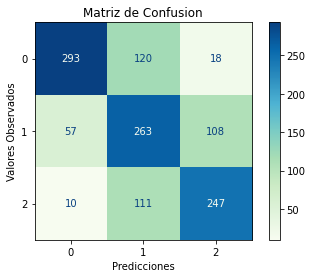

In [51]:
# Matriz de confusion 
y_pred_clas = pd.cut(y_pred.flatten(), bins=bins, labels=False)

# Grafico
mc_rf = confusion_matrix(y_test_clas, y_pred_clas)
disp = ConfusionMatrixDisplay(confusion_matrix=mc_rf)
disp.plot(cmap='GnBu')

plt.title('Matriz de Confusion')
plt.xlabel('Predicciones')
plt.ylabel('Valores Observados')

plt.show()

# Almacenamiento de metricas
mc['RandomForest'] = mc_rf

## 3.6 GradientBoost

Gradient boostig es un algoritmo de machine learning que se basa en la creación de un conjunto de modelos de predicción débiles, generalmente árboles de decisión, que se combinan para formar un modelo de predicción más fuerte. En cada iteración, el algoritmo ajusta los pesos de los modelos débiles para corregir los errores del modelo anterior. Esto se hace mediante la optimización de una función de pérdida diferenciable.

In [52]:
# Librerias
from sklearn.ensemble import GradientBoostingRegressor

En primer lugar, buscamos los hiperparámetros del modelo de la misma forma que lo hemos hecho para el modelo de Radom Forest.

In [53]:
# Posibles profundidades y numero de arboles
ps = np.array(range(50,250)) # profundidades
ns = np.array(range(3,10)) # n arboles

h_parameters = {'n_estimators': ps, 'max_depth': ns}

# Instanciacion del modelo
gb = GradientBoostingRegressor()

# Hiperparametrizacion
rand_search = RandomizedSearchCV(gb,param_distributions = h_parameters, n_iter=5,cv=5)
rand_search.fit(X_cv_train, y_cv_train)

# Optimo
best_rf = rand_search.best_estimator_
print('Mejores hiperparámetros:',  rand_search.best_params_)

Mejores hiperparámetros: {'n_estimators': 150, 'max_depth': 3}


Con estos parámetros, ajustamos el modelo.

In [54]:
# Ajuste del modelo
gb = GradientBoostingRegressor(n_estimators=rand_search.best_params_['n_estimators'], max_depth=rand_search.best_params_['max_depth'])
gb.fit(X_train, y_train)

# Predicciones
y_pred = gb.predict(X_test)

Calculamos las métricas y evaluamos el ajuste del modelo.

In [55]:
# Metricas de test
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_gb  = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f" % rmse_gb)
print('Variance score: %.2f' % r2_gb)

Root Mean squared error: 0.38
Variance score: 0.65


In [56]:
# Almacenamiento de metricas
rmse['GradientBoost'] = rmse_gb
r2['GradientBoost'] = r2_gb

Calculamos la matriz de confusión del modelo.

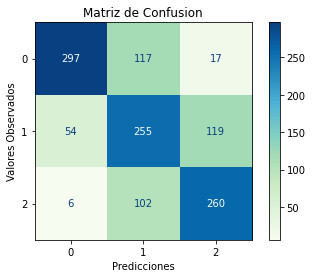

In [57]:
# Matriz de confusion 
y_pred_clas = pd.cut(y_pred.flatten(), bins=bins, labels=False)

# Grafico
mc_gb = confusion_matrix(y_test_clas, y_pred_clas)
disp = ConfusionMatrixDisplay(confusion_matrix=mc_gb)
disp.plot(cmap='GnBu')

plt.title('Matriz de Confusion')
plt.xlabel('Predicciones')
plt.ylabel('Valores Observados')

plt.show()

# Almacenamiento de metricas
mc['GradientBoost'] = mc_gb

## 3.7 XGBoost

El algoritmo XGBoost se basa en el de boosting de gradiente, pero incluye algunas mejoras importantes. Por ejemplo, utiliza regularización L1 y L2 para reducir el overfitting y mejorar la generalización del modelo. Además, utiliza una técnica llamada "pruning" para eliminar los nodos de los árboles de decisión que no son útiles para la predicción.

In [58]:
#!pip install xgboost

In [59]:
# Librerias
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

Como en los casos anteriores, buscamos los hiperparámetros óptimos del modelo, que en este caso es el número de árboles.

In [60]:
# Posibles numero de arboles
ns = {'n_estimators': [10,25,50,100,150,175,200]}

# Ajuste del modelo
xg_boost = xgb.XGBRegressor(objective='reg:squarederror')

# Hiperparametrizacion
cv = GridSearchCV(estimator=xg_boost, param_grid=ns, n_jobs=-1, cv=5)
cv.fit(X_cv_train, y_cv_train)

# nuemro de arboles optimo
print('Numero optimo de arboles:',cv.best_params_)

Numero optimo de arboles: {'n_estimators': 25}


Ajustamos el modelo con $\text{n_estimator} = 25$

In [61]:
# Ajuste del modelo
xgb = XGBRegressor(n_estimators=25)
xgb.fit(X_train, y_train)

# Hacemos predicciones en test
y_pred = xgb.predict(X_test)

Calculamos las métricas y evaluamos el ajuste del modelo.

In [62]:
# Metricas de test
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb  = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f" % rmse_xgb)
print('Variance score: %.2f' % r2_xgb)

Root Mean squared error: 0.39
Variance score: 0.65


In [63]:
# Almacenamiento de metricas
rmse['XGBoost'] = rmse_xgb 
r2['XGBoost'] = r2_xgb 

Calculamos la matriz de confusión del modelo.

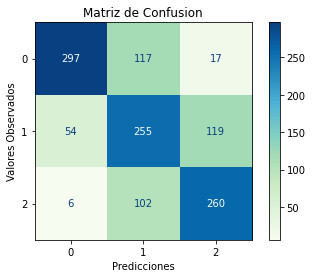

In [64]:
# Matriz de confusion 
y_pred = pd.cut(y_pred.flatten(), bins=bins, labels=False)

# Grafico
mc_xgb = confusion_matrix(y_test_clas, y_pred_clas)
disp = ConfusionMatrixDisplay(confusion_matrix=mc_xgb)
disp.plot(cmap='GnBu')

plt.title('Matriz de Confusion')
plt.xlabel('Predicciones')
plt.ylabel('Valores Observados')

plt.show()

# Almacenamiento de metricas
mc['XGBoost'] = mc_xgb

# 4. Comparación de modelos

Para poder comparar los resultados, hemos ido almacenando las métricas de los modelos en un diccionario.

Se han obtenido los siguientes resultados:

En primer lugar, se muestran las métricas $\text{RMSE}$ (Error cuadrático medio) y $R^2$ (Coeficiente de determinación.

In [65]:
# Resultados
resultados = pd.DataFrame([rmse,r2])
resultados.insert(0, 'Metricas', ['RMSE','R2'])
resultados = resultados.set_index('Metricas')
resultados   

,LReg,KNN,Arbol,Bagging,RandomForest,GradientBoost,XGBoost
Metricas,,,,,,,
RMSE,0.438493,0.424817,0.425448,0.380560,0.39286,0.384894,0.386704
R2,0.550554,0.578150,0.576898,0.661468,0.63923,0.653713,0.650448


En segundo lugar, visualizamos las matrices de confusión.

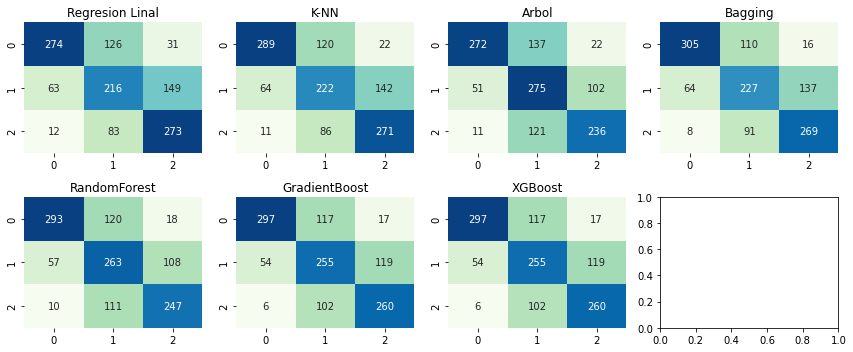

In [66]:
# Matrices de confusion
fig, axes = plt.subplots(2, 4, figsize=(12, 5))

sns.heatmap(mc['LReg'],cmap='GnBu',annot=True,cbar=False, fmt="d",ax=axes[0][0]); axes[0][0].set_title('Regresion Linal')
sns.heatmap(mc['KNN'],cmap='GnBu',annot=True,cbar=False, fmt="d",ax=axes[0][1]); axes[0][1].set_title('K-NN') 
sns.heatmap(mc['Arbol'],cmap='GnBu',annot=True,cbar=False, fmt="d",ax=axes[0][2]); axes[0][2].set_title('Arbol')
sns.heatmap(mc['Bagging'],cmap='GnBu',annot=True,cbar=False, fmt="d",ax=axes[0][3]); axes[0][3].set_title('Bagging')
sns.heatmap(mc['RandomForest'],cmap='GnBu',annot=True,cbar=False, fmt="d",ax=axes[1][0]); axes[1][0].set_title('RandomForest')
sns.heatmap(mc['GradientBoost'],cmap='GnBu',annot=True,cbar=False, fmt="d",ax=axes[1][1]); axes[1][1].set_title('GradientBoost')
sns.heatmap(mc['XGBoost'],cmap='GnBu',annot=True,cbar=False, fmt="d",ax=axes[1][2]); axes[1][2].set_title('XGBoost')

fig.tight_layout()

plt.show()

# 5. Conclusiones

**Conclusiones sobre los agoritmos**

Basado en las métricas $\text{RMSE}$ (Error cuadrático medio) y $R^2$ (Coeficiente de determinación) para una iteración concreta del código anterior, podemos obtener las siguientes conclusiones para los diferentes modelos:

1. **Regresión lineal**: Observamos un $\text{RMSE}$ de $0.439043$ y un $R^2$ de $0.549424$. Esto indica que el modelo de regresión lineal tiene un rendimiento moderado en términos de precisión y ajuste.

2. **KNN**: Observamos un $\text{RMSE}$ de $0.431079$ y un $R^2$ de $0.565622$. Esto sugiere que el modelo KNN tiene un rendimiento similar al de la regresión lineal, con una ligera mejora en la capacidad de explicación de la varianza.

3. **Árbol de decisión**: Los resultados muestran un $\text{RMSE}$ de $0.431175$ y un $R^2$ de $0.565430$. En comparación con la regresión lineal y KNN, el modelo de árbol de decisión ofrece resultados similares.

4. **Bagging**: El modelo Bagging muestra un $\text{RMSE}$ de$0.380890$ y un $R^2$ de $0.660881$. Estos valores indican que el modelo Bagging tiene un rendimiento superior a los modelos anteriores, logrando una mejor precisión y capacidad de ajuste.

5. **RandomForest**: Observamos un $\text{RMSE}$ de $0.393318$ y un $R^2$ de $0.638389$. Esto indica que el modelo de Random Forest tiene un rendimiento similar al del modelo Bagging, aunque ligeramente inferior.

6. **GradientBoost**: Los resultados muestran un $\text{RMSE}$ de $0.384670$ y un $R^2$ de $0.654117$. En comparación con los modelos anteriores, el modelo Gradient Boost ofrece un rendimiento similar.

7. **XGBoost**: El modelo XGBoost muestra un $\text{RMSE}$ de $0.386704$ y un $R^2$ de $0.650448$. Estos valores indican que el modelo XGBoost tiene un rendimiento similar al del modelo de Gradient Boost.

En general, en términos de rendimiento, los modelos Bagging y RandomForest obtuvieron los mejores resultados, con una mayor precisión y capacidad de ajuste. Sin embargo, los modelos de refuerzo de gradiente (GradientBoost y XGBoost) también tuvieron un rendimiento competitivo. Los modelos de regresión lineal y KNN se ubicaron en un nivel ligeramente inferior, mientras que el modelo de árbol de decisión mostró un rendimiento similar a los anteriores.

Así, para elegir uno de los modelos con mejor rendimiento podemos fijarnos en las matrices de confusión.

El modelo de **Bagging** es el que menor error comete en las clasificaciones más extremas, lo cual puede ser importante en un evaluador automático.

**Conclusiones sobre las variables**

Otra parte importante es determinar qué variables son relevantes a la hora de predecir el precio de las casas. Esto puede estudiarse mediante el gráfico de _feature importance_ que ofrecen los modelos donde se analiza el peso de cada variable en la regresión.

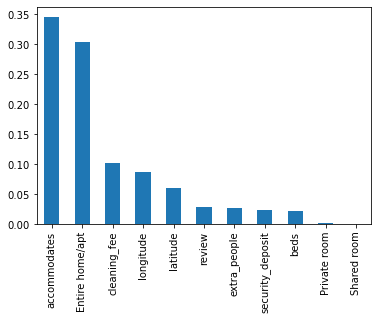

In [67]:
# Importancia de las variabñes
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();

Podemos observar que las variables más influyentes son:
* _accommodates_: Número de huéspedes que pueden alojarse en la propiedad. Consideramos lógico que esta variable sea relevante ya que el tamaño del alojamiento (reflejado en la cantidad de  personas que pueda alojar) suele influir en su precio.
* _Entire home/apt_: Indica si el alojamiento es un apartamento privado. Generalemente, es más probable que el precio de un alojamiento sea mayor si posee esta característica, pues se ofrece la privacidad y comodidad de tener un alojamiento particular. 
* _cleaning_fee_: Indica el precio de la tarifa de limpiza. También consideramos lógico que tenga influencia en el precio del alojamiento, pues supone un gasto adicional para el huésped.

Por otro lado tenemos, también tenemos:
* _latitude_ y  _longitude_: Estos atributos se refieren a la ubicación geográfica del alojamiento. La ubicación suele ser un factor clave en el precio de los alojamientos, ya que la demanda puede variar según la zona y/o cercanía a lugares de interés.